In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [3]:
df.head(5)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.4480,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.4390,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday
2,2,2,ORD100379,2020-01-17,NaN,CUST10079,Divya Kulkarni,24,Female,Consumer,North,Punjab,Amritsar,PROD2195,Nilkamal Study Tables,Furniture,Study Tables,Nilkamal,25174.95,4,25,25174.95,75524.85,0.1664,12567.67,0.12,9062.98,0.00,Standard,84587.83,Net Banking,7,Processing,NaN,No,2020,1,Q1,Friday
3,3,3,ORD100031,2020-01-19,2020-01-23,CUST10152,Kavita Reddy,64,Female,Consumer,Central,Madhya Pradesh,Indore,PROD9901,Puma Jackets,Clothing,Jackets,Puma,2906.00,4,0,0.00,11624.01,0.3756,4366.35,0.12,1394.88,128.97,Standard,13147.86,UPI,4,Delivered,4.0,No,2020,1,Q1,Sunday
4,4,4,ORD100960,2020-01-26,2020-01-29,CUST10164,Rahul Verma,62,Male,Consumer,South,Telangana,Hyderabad,PROD4385,Hometown Curtains,Home Decor,Curtains,Hometown,8735.04,3,5,1310.26,24894.87,0.2495,6211.20,0.12,2987.38,142.58,Standard,28024.83,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Sunday


### Make a simple line plot showing how total sales_amount changes across each order_month

In [12]:
df.groupby('order_month')['sales_amount'].agg(total_sales='sum').sort_values(by='total_sales',ascending=False)

,total_sales
order_month,
12,2347565.38
2,1939979.89
8,1930876.53
5,1851977.57
10,1774719.26
1,1654681.16
3,1567266.29
11,1420156.96
9,1346434.58


### Visualization

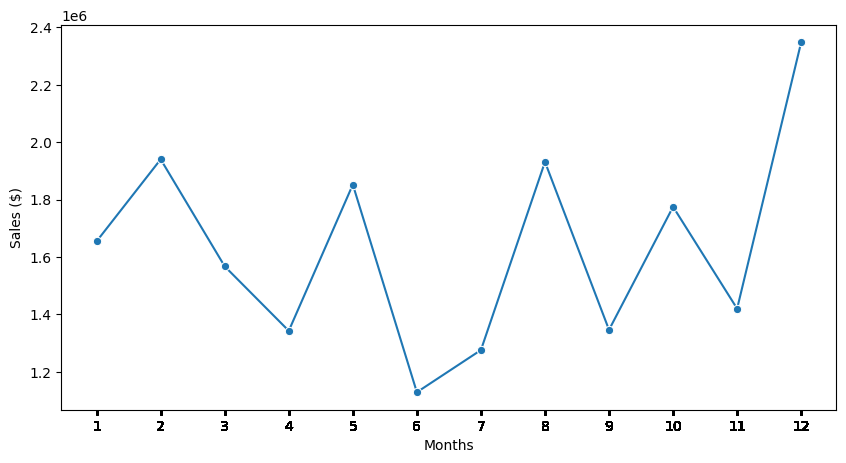

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=df,
    x='order_month',
    y='sales_amount',
    estimator='sum',
    marker='o',
    errorbar=None
    
)

plt.xticks(df.order_month)
plt.xlabel('Months')
plt.ylabel('Sales ($)')
plt.show()

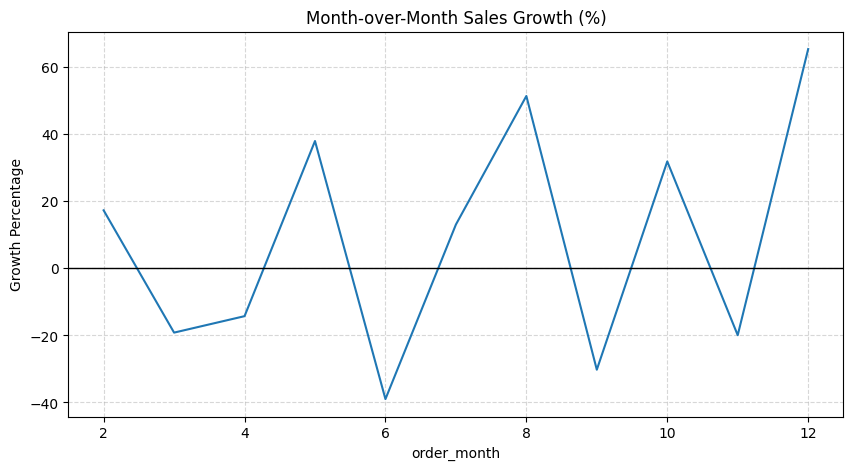

In [43]:
monthly_sale=df.groupby('order_month')['sales_amount'].sum().reset_index()
monthly_sale['mom_growth_pct']=monthly_sale.sales_amount.pct_change()*100

plt.figure(figsize=(10,5))

sns.lineplot(
    data=monthly_sale,
    x='order_month',
    y='mom_growth_pct',
)


plt.axhline(0,color='black',linewidth=1)
plt.title("Month-over-Month Sales Growth (%)")
plt.ylabel('Growth Percentage')
plt.grid(linestyle='--', alpha=0.5)
plt.show()